In [1]:
from astropy.io import fits
import pandas as pd
from astropy.coordinates import SkyCoord
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import scipy
import os

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


plt.rcParams['text.usetex'] = True

In [3]:
RESULTS_FILEPATH = "../results/"
RESULTS_FILEPATH_BAND = [RESULTS_FILEPATH + "iband_hscy3/",
                        RESULTS_FILEPATH + "rband_kids/",
                        RESULTS_FILEPATH + "iband/"]
BAND = ['i', 'r', 'i']

master_comb_df_hsc = pd.read_csv(RESULTS_FILEPATH_BAND[0] + "HSCY3_MATCH_BANDi.csv")
master_comb_df_kids = pd.read_csv(RESULTS_FILEPATH_BAND[1] + "KIDS_MATCH_BANDr.csv")
master_comb_df_des = pd.read_csv(RESULTS_FILEPATH_BAND[2] + "DES_MATCH_BANDi.csv")

In [2]:

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

min, max = master_comb_df_kids["mag0"].min(), master_comb_df_kids["mag0"].max()
common_bin = np.linspace(min, 22.4, 60)

# Plot for master_comb_df_kids
match_idx_kids = (master_comb_df_kids["matched"] == 1)
super_match_idx_kids = (master_comb_df_kids[match_idx_kids]["non_single_star"] == 0) & (master_comb_df_kids[match_idx_kids]["in_galaxy_candidates"] == False)
axes[0].hist(master_comb_df_kids["mag0"], bins=common_bin, label="All PSF Stars", alpha=0.5, color="purple")
axes[0].hist(master_comb_df_kids["mag0"][~match_idx_kids], bins=common_bin, label="Without Gaia Match", alpha=0.5, color="red")
axes[0].hist(master_comb_df_kids["mag0"][match_idx_kids][super_match_idx_kids], bins=common_bin, label="With Gaia Match", alpha=0.5, color="blue")
axes[0].set_title("KiDS-1000", fontsize=20)
axes[0].set_xlabel("$r$-band Magnitude", fontsize=20)
axes[0].set_ylabel("Number of Stars", fontsize=20)


min, max = master_comb_df_des["mag0"].min(), master_comb_df_des["mag0"].max()
common_bin = np.linspace(min, max, 60)

# Plot for master_comb_df_des
match_idx_des = (master_comb_df_des["matched"] == 1)
super_match_idx_des = (master_comb_df_des[match_idx_des]["non_single_star"] == 0) & (master_comb_df_des[match_idx_des]["in_galaxy_candidates"] == False)
axes[1].hist(master_comb_df_des["mag0"], bins=common_bin, label="All PSF Stars", alpha=0.5, color="purple")
axes[1].hist(master_comb_df_des["mag0"][~match_idx_des], bins=common_bin, label="Without Gaia Match", alpha=0.5, color="red")
axes[1].hist(master_comb_df_des["mag0"][match_idx_des][super_match_idx_des], bins=common_bin, label="With Gaia Match", alpha=0.5, color="blue")
axes[1].set_title("DES-Y3", fontsize=20)
axes[1].set_xlabel("$i$-band Magnitude", fontsize=20)

min, max = master_comb_df_hsc["mag0"].min(), master_comb_df_hsc["mag0"].max()
common_bin = np.linspace(min, max, 60)

# Plot for master_comb_df_hsc
match_idx_hsc = (master_comb_df_hsc["matched"] == 1)
super_match_idx_hsc = (master_comb_df_hsc[match_idx_hsc]["non_single_star"] == 0) & (master_comb_df_hsc[match_idx_hsc]["in_galaxy_candidates"] == False)
axes[2].hist(master_comb_df_hsc["mag0"], bins=common_bin, label="All PSF Stars", alpha=0.5, color="purple")
axes[2].hist(master_comb_df_hsc["mag0"][~match_idx_hsc], bins=common_bin, label="Without Gaia Match", alpha=0.5, color="red")
axes[2].hist(master_comb_df_hsc["mag0"][match_idx_hsc][super_match_idx_hsc], bins=common_bin, label="With Gaia Match", alpha=0.5, color="blue")
axes[2].set_title("HSC-Y3", fontsize=20)
axes[2].set_xlabel("$i$-band Magnitude", fontsize=20)

plt.tight_layout()
plt.show()


NameError: name 'master_comb_df_kids' is not defined

Error in callback <function _draw_all_if_interactive at 0x7fc0f1e4e480> (for post_execute):


RuntimeError: Failed to process string with tex because latex could not be found

RuntimeError: Failed to process string with tex because latex could not be found

<Figure size 1500x500 with 3 Axes>

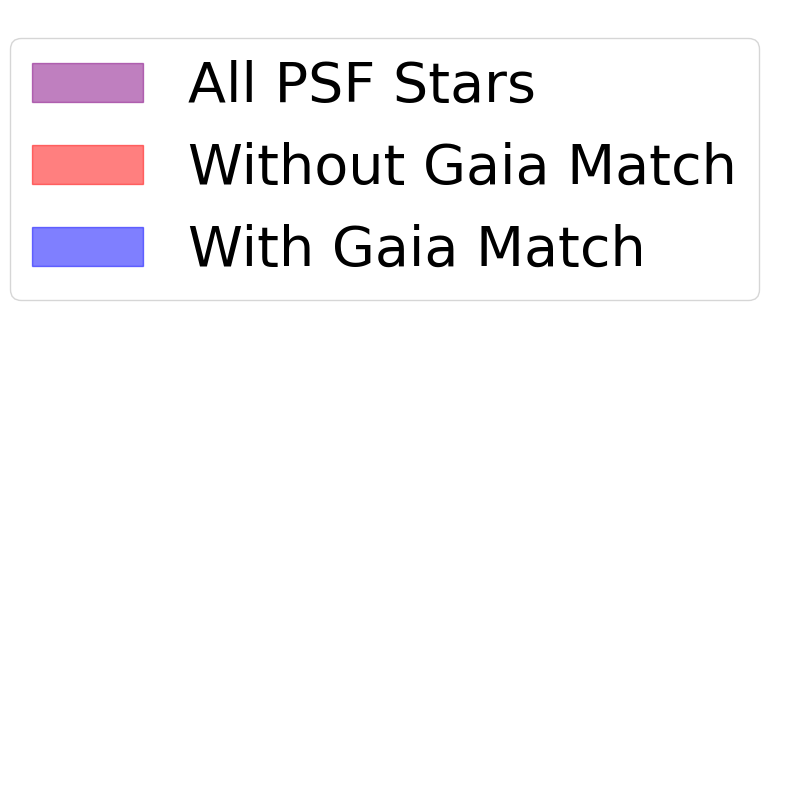

In [40]:
import matplotlib.patches as mpatches

plt.figure(figsize = (10, 10))
plt.axis('off')

# Create empty patches
all_stars_patch = mpatches.Patch(color='purple', label='All PSF Stars', alpha=0.5)
without_match_patch = mpatches.Patch(color='red', label='Without Gaia Match', alpha=0.5)
with_match_patch = mpatches.Patch(color='blue', label='With Gaia Match', alpha=0.5)

# Create legend with the patches
plt.legend(handles=[all_stars_patch, without_match_patch, with_match_patch], fontsize = 40)
plt.savefig("paper_figures/legend.png", dpi=400, transparent=True)

/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/test_notes/match.py:316: RuntimeWarning: invalid value encountered in divide
  plt.bar(mid(failed_star_galaxy_cut[1]), failed_star_galaxy_cut[0] / all_match[0], label = "Fraction Matched Failing Star-Galaxy Cut",color = "orange", width=0.14)
/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/test_notes/match.py:317: RuntimeWarning: invalid value encountered in divide
  plt.bar(mid(galaxy_match[1]), galaxy_match[0] / all_match[0], label = "Fraction Matched Gaia Galaxy Candidates",color = "green", width=0.14)
/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/test_notes/match.py:325: RuntimeWarning: invalid value encountered in divide
  plt.bar(mid(failed_star_galaxy_cut[1]), failed_star_galaxy_cut[0] / all_match[0], label = "Fraction Matched Failing Star-Galaxy Cut",color = "orange", width=0.14)
/home/shrihan/weaklens/gaia_match_psf/gaia_match_psf_code/test_notes/match.py:326: RuntimeWarning: invalid value encounter

<Figure size 640x480 with 0 Axes>

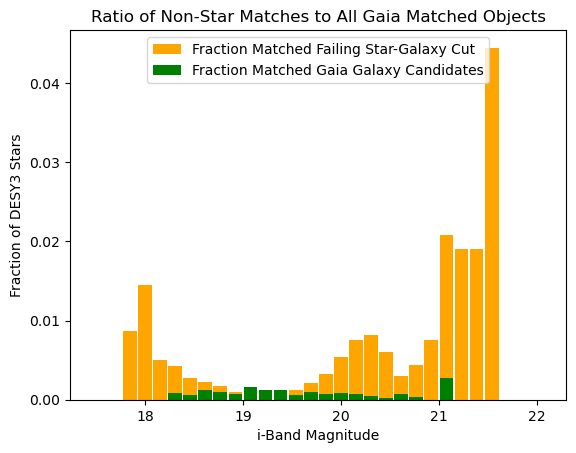

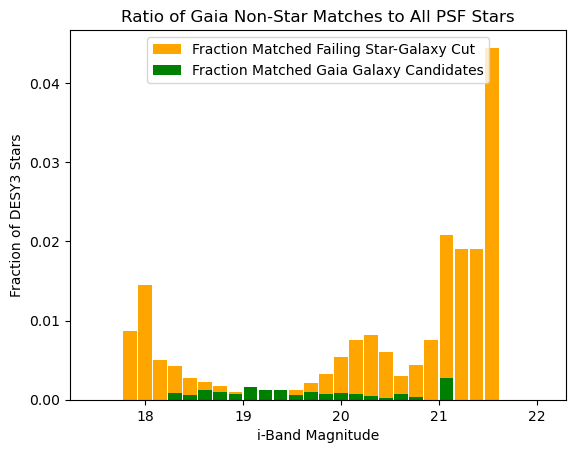

In [7]:
match.galaxy_ratio_plot(master_comb_df, fold = RESULTS_FILEPATH_BAND, BAND = BAND, bounds = [17, 23])